<a href="https://colab.research.google.com/github/gamzenurmadan/cifar10_image_classification/blob/main/image_clustering_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# dataset from: https://www.cs.toronto.edu/~kriz/cifar.html

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
data_type = x_train.dtype
pixel_value_range = f"[{np.min(x_train)}, {np.max(x_train)}]"
class_distribution_train = dict(zip(*np.unique(y_train, return_counts=True)))
class_distribution_test = dict(zip(*np.unique(y_test, return_counts=True)))

In [ ]:
print("CIFAR-10 Dataset Information:")
print("-" * 30)
print("-" * 80)
print(f"{'':<25}{'Features':<30}{'Target':<25}")
print(f"{'Training Set Shape':<25}{str(x_train.shape):<30}{str(y_train.shape):<25}")
print(f"{'Test Set Shape':<25}{str(x_test.shape):<30}{str(y_test.shape):<25}")
print("-" * 80)
print(f"{'Image Size':<25}{str(x_train.shape[1:]):<30}")
print(f"{'Number of Classes':<25}{len(np.unique(y_train)):<30}")
print(f"{'Class Names':<25}{', '.join(cifar10_labels):<25}")
print(f"{'Data Type':<25}{str(data_type):<30}")
print(f"{'Pixel Value Range':<25}{pixel_value_range:<30}")
print(f"{'Class Distribution (Train)':<25}{str(class_distribution_train):<30}")
print(f"{'Class Distribution (Test)':<25}{str(class_distribution_test):<30}")
print("-" * 80)

CIFAR-10 Dataset Information:
------------------------------
--------------------------------------------------------------------------------
                         Features                      Target                   
Training Set Shape       (50000, 32, 32, 3)            (50000, 1)               
Test Set Shape           (10000, 32, 32, 3)            (10000, 1)               
--------------------------------------------------------------------------------
Image Size               (32, 32, 3)                   
Number of Classes        10                            
Class Names              airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
Data Type                uint8                         
Pixel Value Range        [0, 255]                      
Class Distribution (Train){0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Class Distribution (Test){0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8

In [ ]:
#Reducing the training dataset to reasonable amount
samples_per_class = 200

# Initialize empty arrays to store the reduced dataset
x_train_reduced = []
y_train_reduced = []

# Iterate over each class
for class_label in range(10):
    # Find indices of examples belonging to the current class
    class_indices = np.where(y_train == class_label)[0]

    # Randomly sample the desired number of examples for the current class
    sampled_indices = np.random.choice(class_indices, samples_per_class, replace=False)

    x_train_reduced.append(x_train[sampled_indices])
    y_train_reduced.append(y_train[sampled_indices])

x_train_reduced = np.concatenate(x_train_reduced, axis=0)
y_train_reduced = np.concatenate(y_train_reduced, axis=0)

In [ ]:
#Preparing the experimental setup
x_train = x_train_reduced
y_train= y_train_reduced
# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Scale pixel values to the range [0, 1], Normalization
x_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(x_train)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
agglomerative_labels = agglomerative.fit_predict(x_train)

# DBSCAN
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan_labels = dbscan.fit_predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import adjusted_rand_score

true_labels = np.ravel(y_train)

kmeans_score = adjusted_rand_score(true_labels, kmeans_labels)
agglomerative_score = adjusted_rand_score(true_labels, agglomerative_labels)
dbscan_score = adjusted_rand_score(true_labels, dbscan_labels)

In [ ]:
print(kmeans_score)
print(agglomerative_score)
print(dbscan_score)

0.05014463732478728
0.03624721209110285
0.0


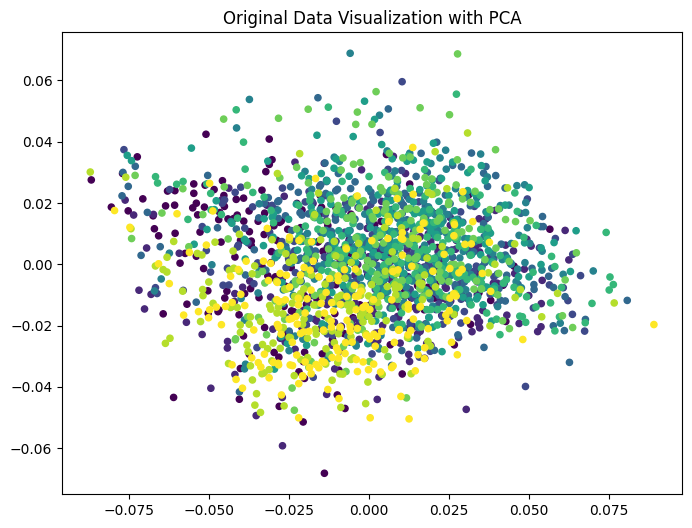

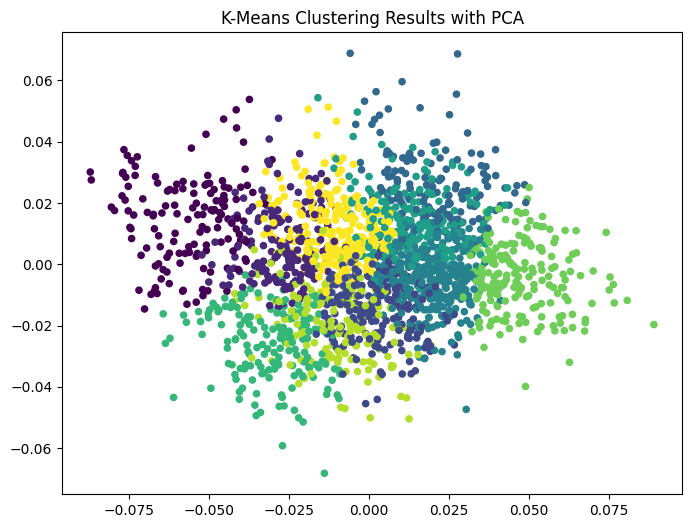

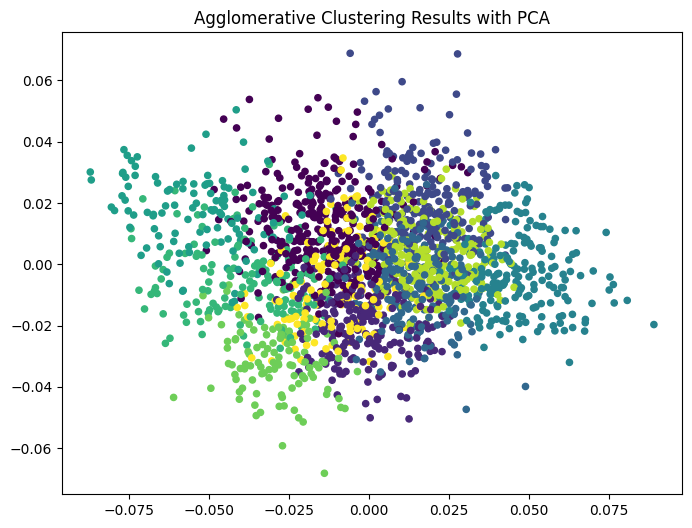

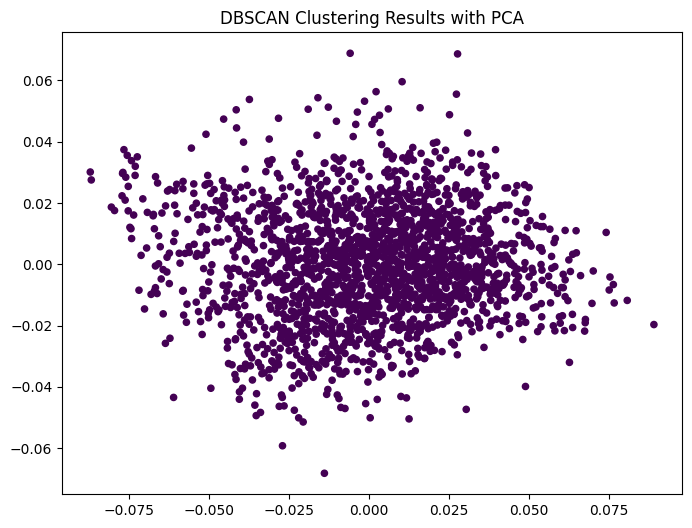

In [ ]:
# Fit PCA to the data for dimension reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

# Plot the results for Original Data
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=true_labels, cmap='viridis', s=20)
plt.title('Original Data Visualization with PCA')
plt.show()

# Plot the results for K-Means
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('K-Means Clustering Results with PCA')
plt.show()

# Plot the results for Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=agglomerative_labels, cmap='viridis', s=20)
plt.title('Agglomerative Clustering Results with PCA')
plt.show()

# Plot the results for DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dbscan_labels, cmap='viridis', s=20)
plt.title('DBSCAN Clustering Results with PCA')
plt.show()

In [ ]:
# Fit TSNE to the data for dimension reduction
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
x_tsne = tsne.fit_transform(x_train)

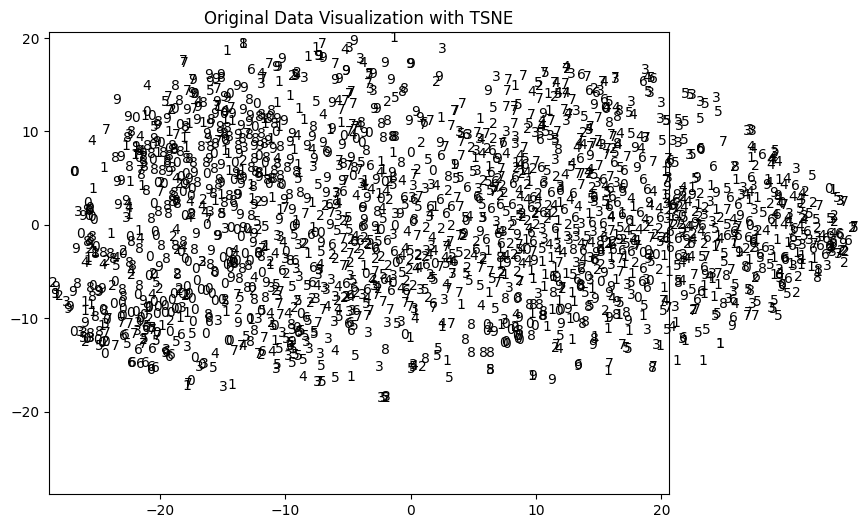

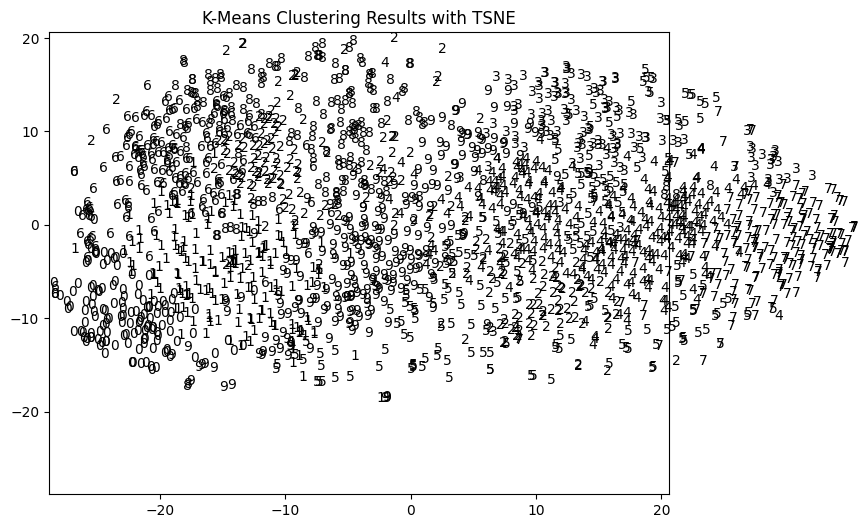

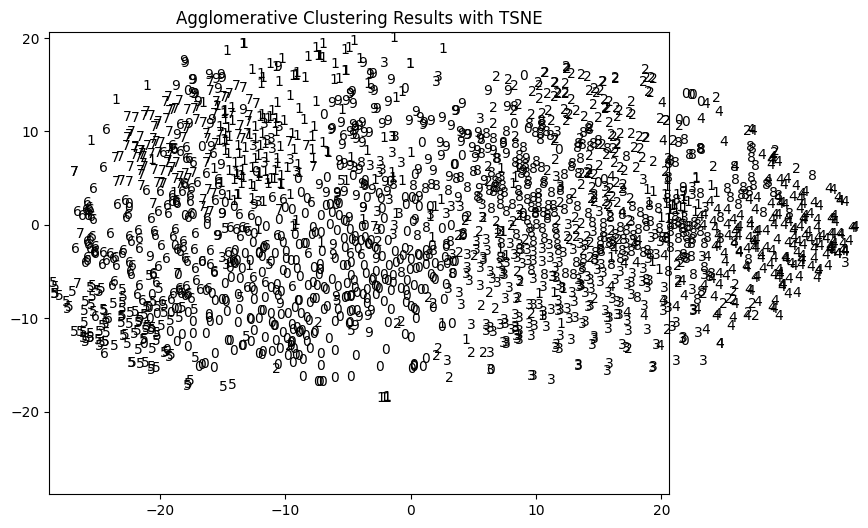

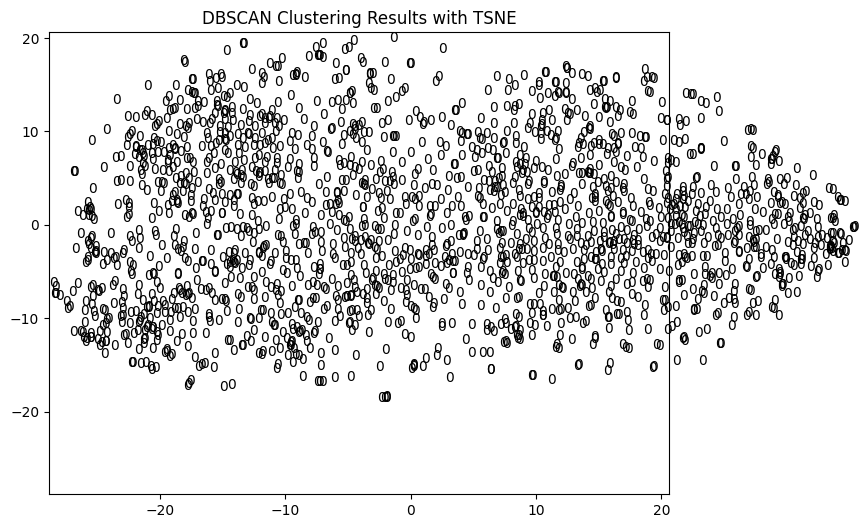

In [ ]:
# Plot the results for Original Data
plt.figure(figsize=(8, 6))
plt.xlim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.ylim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.title('Original Data Visualization with TSNE')
for i in range(len(x_tsne)):
  plt.text(x_tsne[i, 0], x_tsne[i, 1], str(true_labels[i]))

# Plot the results for K-Means Clustering
plt.figure(figsize=(8, 6))
plt.xlim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.ylim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.title('K-Means Clustering Results with TSNE')
for i in range(len(x_tsne)):
  plt.text(x_tsne[i, 0], x_tsne[i, 1], str(kmeans_labels[i]))

# Plot the results for Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.xlim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.ylim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.title('Agglomerative Clustering Results with TSNE')
for i in range(len(x_tsne)):
  plt.text(x_tsne[i, 0], x_tsne[i, 1], str(agglomerative_labels[i]))

# Plot the results for DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.xlim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.ylim(x_tsne[:, 0].min(), x_tsne[:, 1].max()+1)
plt.title('DBSCAN Clustering Results with TSNE')
for i in range(len(x_tsne)):
  plt.text(x_tsne[i, 0], x_tsne[i, 1], str(dbscan_labels[i]))

plt.show()

In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Resize the image to the same dimensions as CIFAR-10 images (32x32 pixels)
    image = image.resize((32, 32))

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Flatten the image
    image_flattened = image_array.reshape(32 * 32 * 3)  # Assuming RGB color channels

    # Scale pixel values to the range [0, 1]
    image_scaled = image_flattened.astype('float32') / 255.0

    return image_scaled

In [ ]:
new_image_path = '/content/dog.jpg'  # Replace with the path to your image
preprocessed_image = preprocess_image(new_image_path)

updated_x_train = np.vstack([x_train, preprocessed_image])

In [ ]:
# K-Means clustering
updated_kmeans_labels = kmeans.fit_predict(updated_x_train)
# Agglomerative Clustering
updated_agglomerative_labels = agglomerative.fit_predict(updated_x_train)
# DBSCAN
updated_dbscan_labels = dbscan.fit_predict(updated_x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
added_image_kmeans_label = updated_kmeans_labels[-1]
added_image_agglomerative_label = updated_agglomerative_labels[-1]
added_image_dbscan_label = updated_dbscan_labels[-1]

In [ ]:
updated_x_tsne = tsne.fit_transform(updated_x_train)

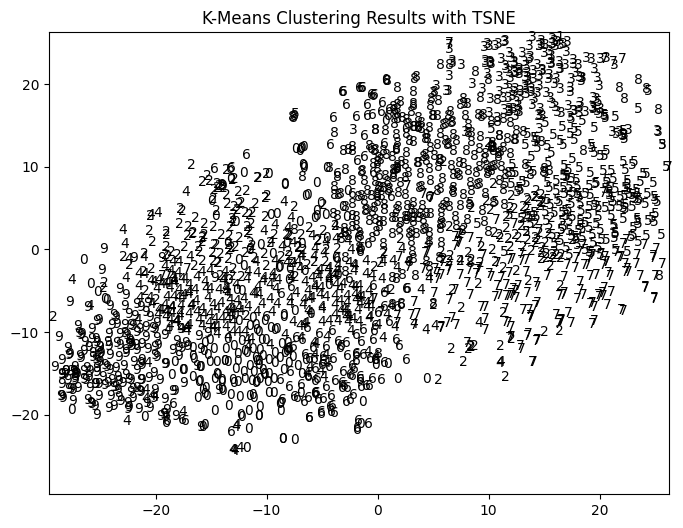

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlim(updated_x_tsne[:, 0].min(), updated_x_tsne[:, 1].max()+1)
plt.ylim(updated_x_tsne[:, 0].min(), updated_x_tsne[:, 1].max()+1)
plt.title('K-Means Clustering Results with TSNE')
for i in range(len(updated_x_tsne)):
  plt.text(updated_x_tsne[i, 0], updated_x_tsne[i, 1], str(updated_kmeans_labels[i]))

1
[[0.9999999]]
1
Most Similar Images:


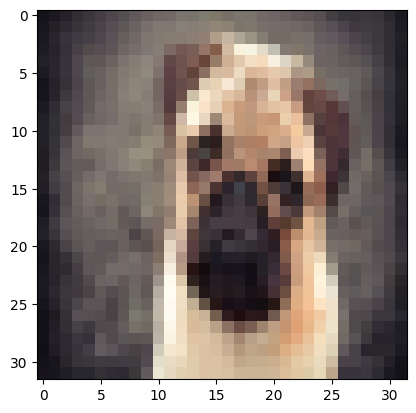

IndexError: ignored

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
image_cluster_mask = (updated_kmeans_labels == added_image_kmeans_label)
similar_images = updated_x_train[image_cluster_mask]
# Calculate similarity and sort
similarity_scores = cosine_similarity(preprocessed_image.reshape(1, -1), similar_images.reshape(similar_images.shape[0], -1))
similar_images_sorted = similar_images[np.argsort(similarity_scores[0])[::-1]]

# Print the first five similar images
print("Most Similar Images:")
for i in range(5):
    # Assuming you are using matplotlib to plot images
    plt.imshow(similar_images_sorted[i].reshape(32, 32, 3))  # Adjust dimensions based on your data
    plt.show()